# Gaussian Regression

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [29]:
# Create dataset
x = np.linspace (0, 2*np.pi, 10)

# Actual function
y = np.sin(x)

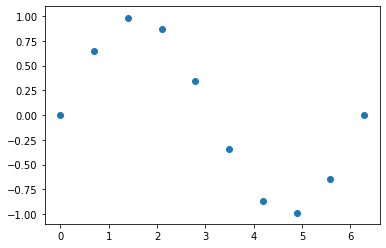

In [30]:
# Plotting the real function (scatter)
plt.scatter (x, y) 

In [52]:
# Creating dataset with random normal noise added to function
y_true = np.sin (x) + np.random.normal (0,0.03, 10)

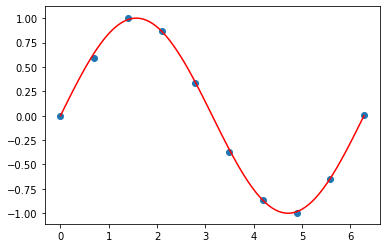

In [53]:
# Plot the real data (noised) with respect to actual sine function
plt.scatter (x, y_true)
val = np.linspace (0,2*np.pi, 100)
plt.plot (val, np.sin (val), color = "red")
plt.show ()

In [98]:
# General functiont with take x data matrix of D dimension and o order to create a M dimension data natrix X

def data (x, m):
    
    df = []
    mm = []
    ul = 2*np.pi
    ll = 0
    for i in range (m-1):
        mm.append (((ul - ll)/(m)) * (i+1))
    #mm = [np.pi/2, np.pi + np.pi/2]
    for i in x:
        z = [1]
        for j in mm:
            z.append (norm.pdf (i, j, 1))
        df.append (z)
        
    df = pd.DataFrame (df)
    return df

In [96]:
# Create data frame of data x with order 5 (passing through 5 ba)
df = data (x, 2)
df

,0,1
0,1,0.000001
1,1,0.000038
2,1,0.000604
3,1,0.005856
4,1,0.034895
5,1,0.127710
6,1,0.287087
7,1,0.396400
8,1,0.336189
9,1,0.175131


In [56]:
def find_weights (X, Y):
    
    rhs = np.matmul (X.T, Y)
    lhs = np.matmul (X.T, X)
    
    return np.matmul (np.linalg.inv (lhs), rhs)

In [57]:
def linear_regression (x, y, m):
    
    df = data (x, m)
    w = find_weights (df.values, y)
    
    plt.scatter (x, y, color = "grey")
    val = np.linspace (min (x), max(x), 100)
    plt.plot (val, np.matmul (data (val, m).values, w), color = "red")
    
    return w

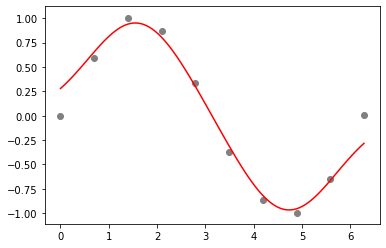

In [79]:
w = linear_regression (x, y_true, 2)



 Degree:  1


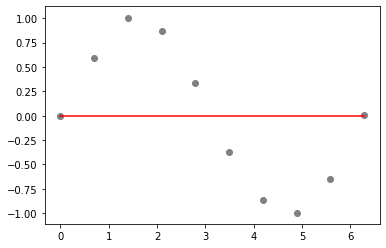



 Degree:  2


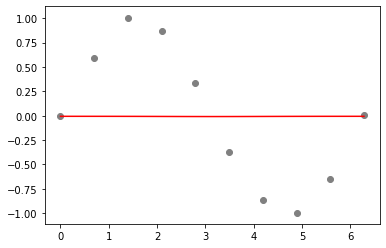



 Degree:  3


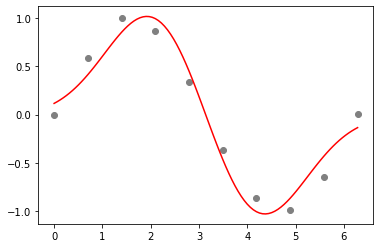



 Degree:  4


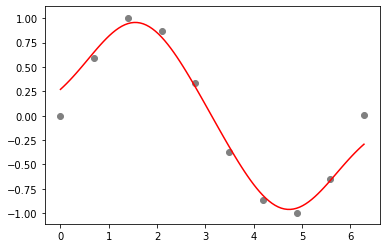



 Degree:  5


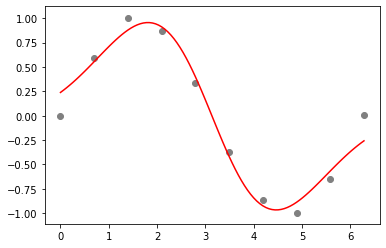



 Degree:  6


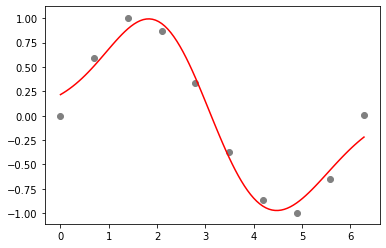



 Degree:  7


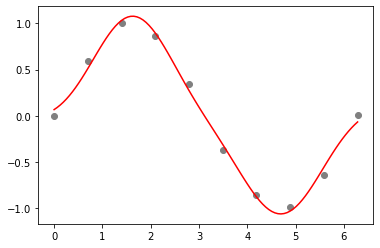



 Degree:  8


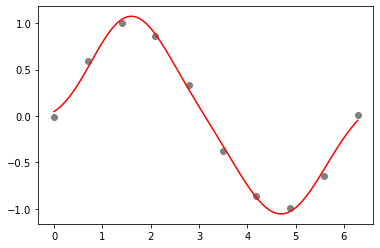



 Degree:  9


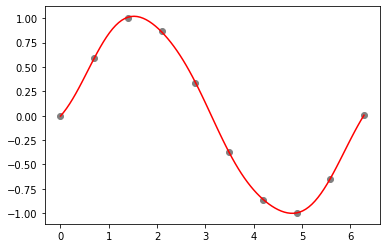



 Degree:  10


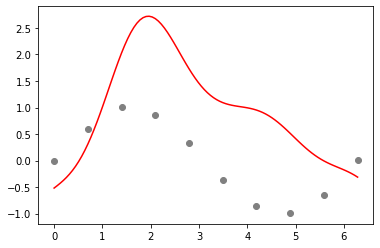

In [99]:
for i in range (1, 11):
    print ("\n\n Degree: ", i)
    w = linear_regression (x, y_true, i)
    plt.show ()